## Clustering

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import entropy
from sklearn.preprocessing import MinMaxScaler
plt.style.use('seaborn-white')

In [5]:
# Leggiamo il dataframe dal file csv 'clienti.csv'
clienti = pd.read_csv('clienti.csv', sep=',', index_col='CustomerID')
clienti.head(3)

,Imax,Recency,Frequency,MonetaryValue,EntropyProducts
CustomerID,,,,,
12347,676,1,182,4310.00,4.464578
12348,1248,74,27,1437.24,2.987771
12349,630,18,72,1457.55,4.276666


## Hierarchical Clustering con funzione di distanza = distanza euclidea

Abbiamo scelto di eseguire prima il clustering gerarchico per ottenere una stima iniziale del valore di K da utilizzare con l'algoritmo KMeans.

In [3]:
from scipy.stats import mode
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram

Eseguiamo il clustering gerarchico utilizzando le seguenti tipologie di linkage: complete, single e average.

In [34]:
scaler = MinMaxScaler()
X = scaler.fit_transform(clienti.values)
# Calcoliamo le distanze
data_distance = pdist(X, metric='euclidean')

### Linkage: COMPLETE

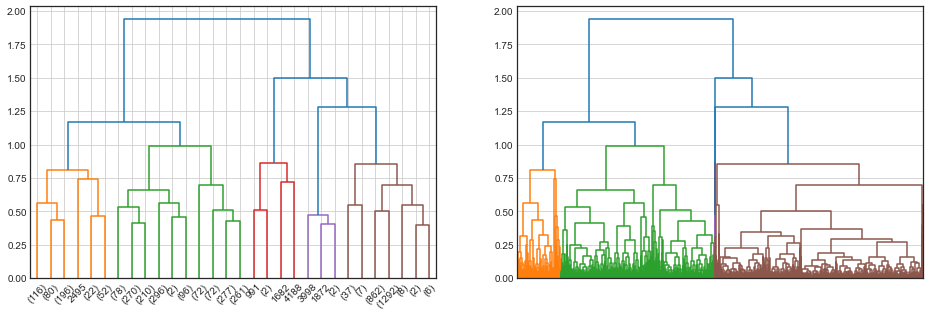

In [35]:
# Scegliamo il metodo da usare
data_linkage = linkage(data_distance, method='complete', metric='euclidean')

# Creiamo la figura che contiene i due dendrogrammi, uno troncato e uno intero
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_figheight(5)
fig.set_figwidth(16)

# Plottiamo il dendrogramma (trocato)
axes[0].grid()
axes[1].grid()
res_1 = dendrogram(data_linkage, color_threshold=1.0, truncate_mode='lastp', ax=axes[0])

# Plottiamo il dendrogramma (tutto intero)
res_2 = dendrogram(data_linkage, color_threshold=1.0, no_labels=True, ax=axes[1])

Facendo riferimento al dendrogramma con truncate_mode='lastp', se lo tagliamo ad altezza 1.25 otteniamo 4 cluster, mentre se lo tagliamo ad altezza 1.4 (circa) otteniamo 3 cluster.

### Linkage: SINGLE

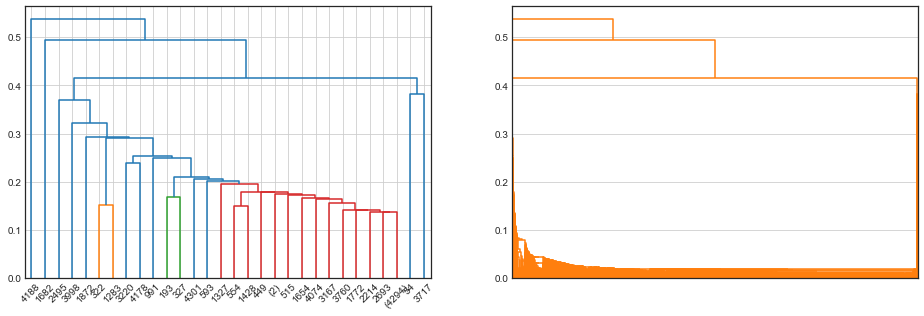

In [36]:
# Scegliamo il metodo da usare
data_linkage = linkage(data_distance, method='single', metric='euclidean')
# Creiamo la figura che contiene i due dendrogrammi, uno troncato e uno intero
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_figheight(5)
fig.set_figwidth(16)

axes[0].grid()
axes[1].grid()

# Plottiamo il dendrogramma (trocato)
res_1 = dendrogram(data_linkage, color_threshold=0.2, truncate_mode='lastp',ax=axes[0])
# Plottiamo il dendrogramma (tutto intero)
res_2 = dendrogram(data_linkage, color_threshold=1.0, no_labels=True, ax=axes[1])


Utilizzando il linkage single, il clustering non sembra essere significativo.

### Linkage: AVERAGE

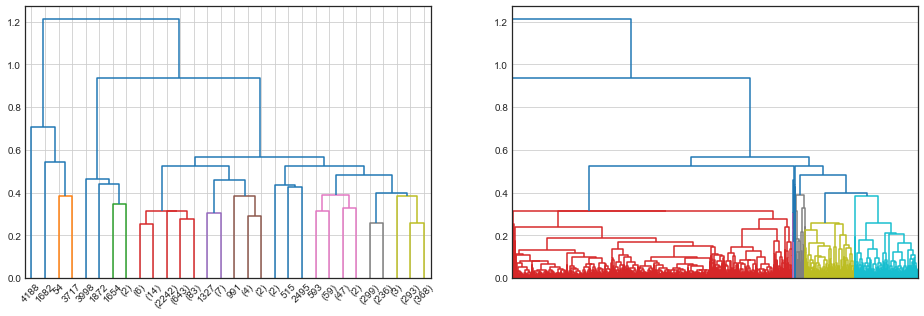

In [37]:
# Scegliamo il metodo da usare
data_linkage = linkage(data_distance, method='average', metric='euclidean')

# Creiamo la figura che contiene i due dendogrammi, uno troncato e uno intero
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_figheight(5)
fig.set_figwidth(16)

axes[0].grid()
axes[1].grid()

# Plottiamo il dendrogramma (trocato)
res_1 = dendrogram(data_linkage, color_threshold=0.4, truncate_mode='lastp', ax=axes[0])
# Plottiamo il dendrogramma (tutto intero)
res_2 = dendrogram(data_linkage, color_threshold=0.4, no_labels=True, ax=axes[1])

Facendo riferimento al dendrogramma con truncate_mode='lastp', se lo tagliamo ad altezza 0.8 otteniamo 3 cluster. Dai dendrogrammi possiamo quindi stimare un valore di K = 3 da utilizzare nell'algoritmo Kmeans.

## Hierarchical Clustering con funzione di distanza = distanza di Chebyshev

In [38]:
data_distance = pdist(X, metric='chebyshev')

Eseguiamo il clustering gerarchico utilizzando le seguenti tipologie di linkage: complete, single e average.

### Linkage: COMPLETE

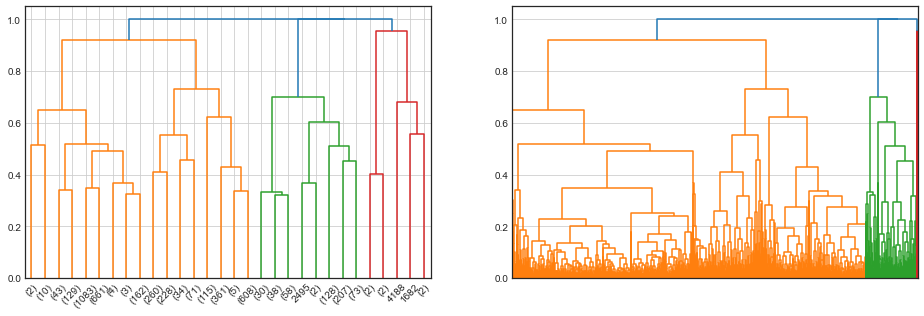

In [39]:
# Scegliamo il metodo da usare
data_linkage = linkage(data_distance, method='complete', metric='chebyshev')

# Creiamo la figura che contiene i due dendrogrammi, uno troncato e uno intero
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_figheight(5)
fig.set_figwidth(16)

# Plottiamo il dendrogramma (trocato)
axes[0].grid()
axes[1].grid()
res_1 = dendrogram(data_linkage, color_threshold=1.0, truncate_mode='lastp', ax=axes[0])

# Plottiamo il dendrogramma (tutto intero)
res_2 = dendrogram(data_linkage, color_threshold=1.0, no_labels=True, ax=axes[1])

In riferimento al dendrogramma con truncate_mode='lastp', possiamo tagliare ad altezza 0.95 e ottenere 3 cluster. In alternativa potremmo tagliare ad altezza 0.8 e ottenere 5 cluster.

### Linkage: SINGLE

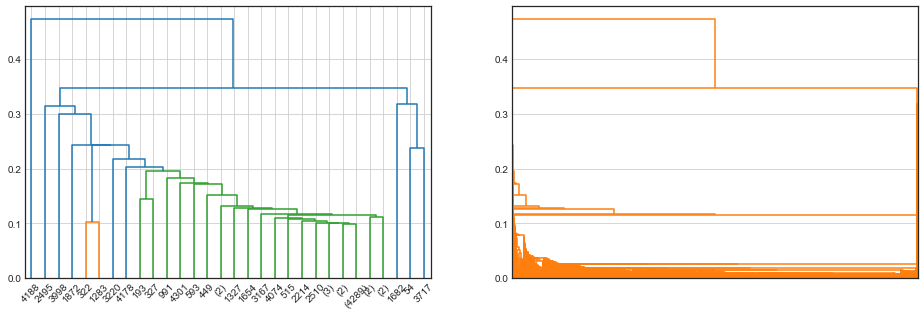

In [40]:
# Scegliamo il metodo da usare
data_linkage = linkage(data_distance, method='single', metric='chebyshev')
# Creiamo la figura che contiene i due dendrogrammi, uno troncato e uno intero
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_figheight(5)
fig.set_figwidth(16)

axes[0].grid()
axes[1].grid()

# Plottiamo il dendrogramma (trocato)
res_1 = dendrogram(data_linkage, color_threshold=0.2, truncate_mode='lastp',ax=axes[0])
# Plottiamo il dendrogramma (tutto intero)
res_2 = dendrogram(data_linkage, color_threshold=1.0, no_labels=True, ax=axes[1])

Utilizzando il linkage single, il clustering non sembra essere significativo.

### Linkage: AVERAGE

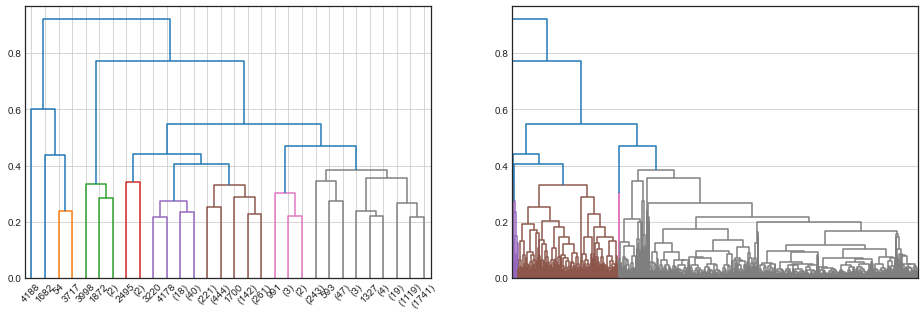

In [41]:
# Scegliamo il metodo da usare
data_linkage = linkage(data_distance, method='average', metric='chebyshev')

# Creiamo la figura che contiene i due dendogrammi, uno troncato e uno intero
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_figheight(5)
fig.set_figwidth(16)

axes[0].grid()
axes[1].grid()

# Plottiamo il dendrogramma (trocato)
res_1 = dendrogram(data_linkage, color_threshold=0.4, truncate_mode='lastp', ax=axes[0])
# Plottiamo il dendrogramma (tutto intero)
res_2 = dendrogram(data_linkage, color_threshold=0.4, no_labels=True, ax=axes[1])

In riferimento al dendrogramma con truncate_mode='lastp', possiamo tagliare ad altezza 0.7 e ottenere 3 cluster. Oppure potremmo tagliare ad altezza 0.55 e ottenere 4 cluster.

## K-Means

In [42]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import metrics

### Knee Method per stimare K

Per stimare il valore migliore del parametro K, ossia il numero di cluster, utilizziamo il Knee Method, calcolando le metriche SSE, silhouette e separation.

In [43]:
X = scaler.fit_transform(clienti.values)
# sse_list[i] indica il valore di SSE usando K=i
sse_list = list()
# silhouette_list[i] indica il valore di silhouette usando K=i
silhouette_list = list()
# separation_list[i] indica il valore di separation usando K=i
separation_list = list()
# Proviamo k = 2, 3, ..., 10
max_k = 10
for k in range(2, max_k + 1):
    # Facciamo il KMeans con K=k
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=300)
    kmeans.fit(X)
    # Aggiungiamo alle liste definite sopra i rispettivi valori
    sse_list.append(kmeans.inertia_)
    silhouette_list.append(silhouette_score(X, kmeans.labels_))
    separation_list.append(metrics.davies_bouldin_score(X, kmeans.labels_))

Plottiamo i grafici di SSE, silhouette e separation.

[Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '9'),
 Text(0, 0, '10')]

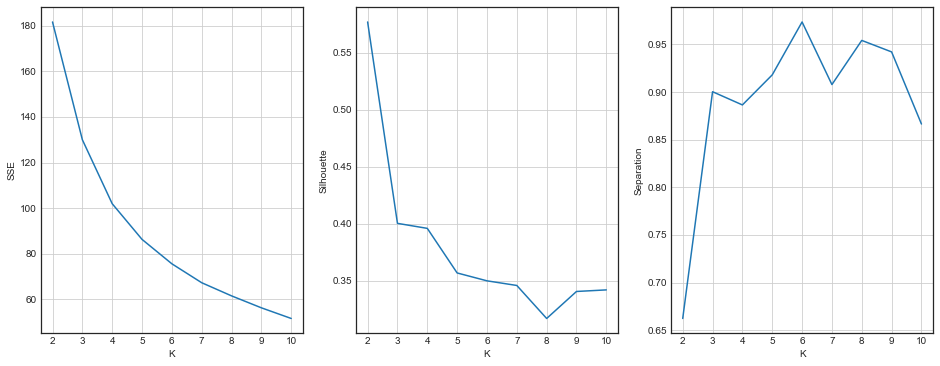

In [44]:
fig, axes = plt.subplots(nrows=1, ncols=3)
fig.set_figheight(6)
fig.set_figwidth(16)

x = [2, 3, 4, 5, 6, 7, 8, 9, 10]
x_labels = ['2', '3', '4', '5', '6', '7', '8', '9', '10']

axes[0].plot(range(2, len(sse_list) + 2), sse_list)
axes[0].set(xlabel='K', ylabel ='SSE')
axes[0].grid()
axes[0].set_xticks(x)
axes[0].set_xticklabels(x_labels)


axes[1].plot(range(2, len(silhouette_list) + 2), silhouette_list)
axes[1].set(xlabel='K', ylabel ='Silhouette', )
axes[1].grid()
axes[1].set_xticks(x)
axes[1].set_xticklabels(x_labels)

axes[2].plot(range(2, len(separation_list) + 2), separation_list)
axes[2].set(xlabel='K', ylabel ='Separation')
axes[2].grid()
axes[2].set_xticks(x)
axes[2].set_xticklabels(x_labels)

Dai grafici si ottiene che due possibili valori di K sono 2 e 3. Infatti, osservando i grafici si nota che la silhouette ha valore massimo in K=2, la separation ha valore minimo in K=2. Mentre l'SSE decresce più lentamente per K > 3.

## Cluster usando KMeans con K = 3

Abbiamo deciso di applicare l'algoritmo KMeans con K = 3 sul dataframe clienti in quanto anche facendo riferimento al clustering gerarchico sembra essere un valore più appropriato rispetto a K = 2.

In [45]:
X = scaler.fit_transform(clienti.values)
kmeans = KMeans(n_clusters=3, n_init=10, max_iter=300)
kmeans.fit(X)

KMeans(n_clusters=3)

In [46]:
# Contiamo quanti elementi ci sono in ogni cluster
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2]), array([1425,  971, 1928], dtype=int64))

In [47]:
# Assegnamo ad ogni cluster un colore diverso
colors = {0: 'red', 1: 'green', 2: 'blue'}
# Assegnamo ad ogni label il rispettivo colore
c = [colors[label] for label in kmeans.labels_]

Dato che il dataframe clienti ha 5 attributi, abbiamo scelto di usare degli scatter plot bidimiensionali, visualizzando ogni possibile coppia di attributi.

In [48]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

In [49]:
for center in centers:
    print("Imax: ", center[0])
    print("Recency: ", center[1])
    print("Frequency: ", center[2])
    print("MonetaryValue: ", center[3])
    print("EntropyProducts: ", center[4])
    print("\n")

Imax:  268.4634146341463
Recency:  65.28919860627178
Frequency:  23.289198606271764
MonetaryValue:  789.767379790941
EntropyProducts:  2.666247593736549


Imax:  211.68898043254373
Recency:  257.6024716786818
Frequency:  25.918640576725014
MonetaryValue:  479.3596189495366
EntropyProducts:  2.668985234713176


Imax:  505.00052137643377
Recency:  28.071949947862343
Frequency:  171.3467153284672
MonetaryValue:  3416.1258811261723
EntropyProducts:  4.383420190233831




I tre centroidi potrebbero rappresentare tre diverse categorie di clienti. In particolare l'ultimo centroide rappresenta un cliente che ha fatto molti acquisti e speso molto. Infatti, i valori di Frequency e MonetaryValue sono alti (un ordine di grandezza superiori) rispetto ai valori di Frequency e MonetaryValue degli altri due centroidi. Inoltre, l'ultimo centroide ha Recency più bassa rispetto agli altri due centroidi, questo indica che i clienti del cluster rappresentato dall'ultimo centroide hanno effettuato l'ultimo acquisto più recentemente. Questo valore è in linea con il fatto che il valore di Frequency è più alto rispetto agli altri due centroidi.

In [50]:
clienti.head(1)

,Imax,Recency,Frequency,MonetaryValue,EntropyProducts
CustomerID,,,,,
12347,676,1,182,4310.0,4.464578


[Text(0, 0.5, 'EntropyProducts'), Text(0.5, 0, 'Imax')]

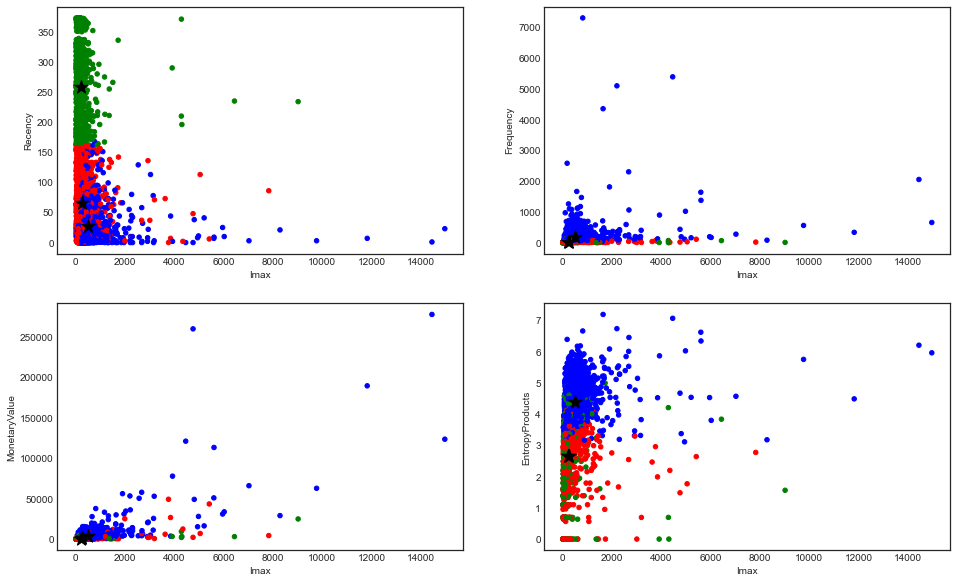

In [51]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(16)
axes[0,0].scatter(clienti['Imax'], clienti['Recency'], c=c, s=20)
axes[0,0].scatter(centers[:, 0], centers[:, 1], s=200, marker='*', c='k')
axes[0,0].set(xlabel='Imax', ylabel ='Recency')

axes[0,1].scatter(clienti['Imax'], clienti['Frequency'], c=c, s=20)
axes[0,1].scatter(centers[:, 0], centers[:, 2], s=200, marker='*', c='k')
axes[0,1].set(xlabel='Imax', ylabel ='Frequency')

axes[1,0].scatter(clienti['Imax'], clienti['MonetaryValue'], c=c, s=20)
axes[1,0].scatter(centers[:, 0], centers[:, 3], s=200, marker='*', c='k')
axes[1,0].set(xlabel='Imax', ylabel ='MonetaryValue')

axes[1,1].scatter(clienti['Imax'], clienti['EntropyProducts'], c=c, s=20)
axes[1,1].scatter(centers[:, 0], centers[:, 4], s=200, marker='*', c='k')
axes[1,1].set(xlabel='Imax', ylabel ='EntropyProducts')

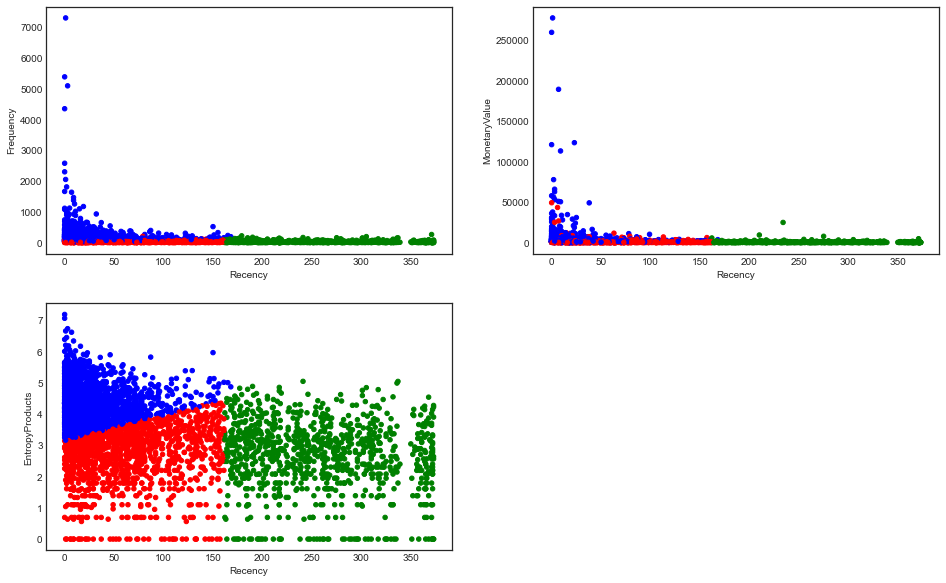

In [52]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(16)
axes[0,0].scatter(clienti['Recency'], clienti['Frequency'], c=c, s=20)
axes[0,0].set(xlabel='Recency', ylabel ='Frequency')

axes[0,1].scatter(clienti['Recency'], clienti['MonetaryValue'], c=c, s=20)
axes[0,1].set(xlabel='Recency', ylabel ='MonetaryValue')

axes[1,0].scatter(clienti['Recency'], clienti['EntropyProducts'], c=c, s=20)
axes[1,0].set(xlabel='Recency', ylabel ='EntropyProducts')
fig.delaxes(axes[1][1])

[Text(0, 0.5, 'EntropyProducts'), Text(0.5, 0, 'Frequency')]

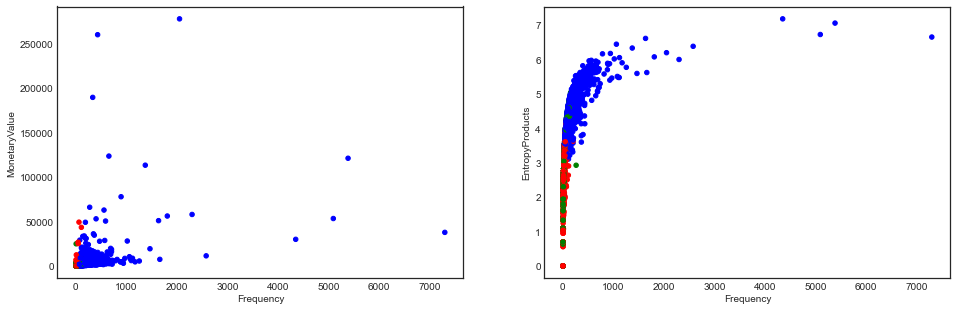

In [53]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_figheight(5)
fig.set_figwidth(16)
axes[0].scatter(clienti['Frequency'], clienti['MonetaryValue'], c=c, s=20)
axes[0].set(xlabel='Frequency', ylabel ='MonetaryValue')

axes[1].scatter(clienti['Frequency'], clienti['EntropyProducts'], c=c, s=20)
axes[1].set(xlabel='Frequency', ylabel ='EntropyProducts')

[Text(0, 0.5, 'EntropyProducts'), Text(0.5, 0, 'MonetaryValue')]

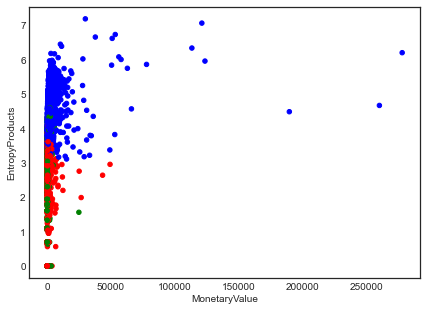

In [54]:
fig, axes = plt.subplots(nrows=1, ncols=1)
fig.set_figheight(5)
fig.set_figwidth(7)
axes.scatter(clienti['MonetaryValue'], clienti['EntropyProducts'], c=c, s=20)
axes.set(xlabel='MonetaryValue', ylabel ='EntropyProducts')

## KMeans su dataframe aventi 3 attributi

Per avere una visione più chiara dei risultati del KMeans, proviamo a suddividere il dataframe clienti in 10 dataframe (10 perché proviamo tutte le possibili combinazioni diverse di tre attributi), dove ciascuno di essi ha tre attributi. In questo modo riusciamo a visualizzare in 3 dimensioni i risultati del Kmeans su questi dataframe. Inoltre, riducendo la dimensionalità del dataframe ci potremmo aspettare risultati migliori.

In [55]:
# Imax, Recency, Frequency
df_1 = clienti.drop(columns=['MonetaryValue', 'EntropyProducts'])

# Imax, Recency, MonetaryValue
df_2 = clienti.drop(columns=['Frequency', 'EntropyProducts'])

# Imax, Recency, EntropyProducts
df_3 = clienti.drop(columns=['Frequency', 'MonetaryValue'])

# Imax, Frequency, MonetaryValue
df_4 = clienti.drop(columns=['Recency', 'EntropyProducts'])

# Imax, Frequency, EntropyProducts
df_5 = clienti.drop(columns=['Recency', 'MonetaryValue'])

# Imax, MonetaryValue, EntropyProducts
df_6 = clienti.drop(columns=['Frequency', 'Recency'])

# Recency, Frequency, MonetaryValue
df_7 = clienti.drop(columns=['Imax', 'EntropyProducts'])

# Recency, Frequency, EntropyProducts
df_8 = clienti.drop(columns=['Imax', 'MonetaryValue'])

# Recency, MonetaryValue, EntropyProducts
df_9 = clienti.drop(columns=['Imax', 'Frequency'])

# Frequency, MonetaryValue, EntropyProducts
df_10 = clienti.drop(columns=['Imax', 'Recency'])

result_1_kmeans = KMeans(n_clusters=3, n_init=10, max_iter=300)
X_1 = scaler.fit_transform(df_1.values)
result_1_kmeans.fit(X_1)
c_1 = [colors[label] for label in result_1_kmeans.labels_]
centers_1 = scaler.inverse_transform(result_1_kmeans.cluster_centers_)


result_2_kmeans = KMeans(n_clusters=3, n_init=10, max_iter=300)
X_2 = scaler.fit_transform(df_2.values)
result_2_kmeans.fit(X_2)
c_2 = [colors[label] for label in result_2_kmeans.labels_]


result_3_kmeans = KMeans(n_clusters=3, n_init=10, max_iter=300)
X_3 = scaler.fit_transform(df_3.values)
result_3_kmeans.fit(X_3)
c_3 = [colors[label] for label in result_3_kmeans.labels_]

result_4_kmeans = KMeans(n_clusters=3, n_init=10, max_iter=300)
X_4 = scaler.fit_transform(df_4.values)
result_4_kmeans.fit(X_4)
c_4 = [colors[label] for label in result_4_kmeans.labels_]

result_5_kmeans = KMeans(n_clusters=3, n_init=10, max_iter=300)
X_5 = scaler.fit_transform(df_5.values)
result_5_kmeans.fit(X_5)
c_5 = [colors[label] for label in result_5_kmeans.labels_]

result_6_kmeans = KMeans(n_clusters=3, n_init=10, max_iter=300)
X_6 = scaler.fit_transform(df_6.values)
result_6_kmeans.fit(X_6)
c_6 = [colors[label] for label in result_6_kmeans.labels_]

result_7_kmeans = KMeans(n_clusters=3, n_init=10, max_iter=300)
X_7 = scaler.fit_transform(df_7.values)
result_7_kmeans.fit(X_7)
c_7 = [colors[label] for label in result_7_kmeans.labels_]

result_8_kmeans = KMeans(n_clusters=3, n_init=10, max_iter=300)
X_8 = scaler.fit_transform(df_8.values)
result_8_kmeans.fit(X_8)
c_8 = [colors[label] for label in result_8_kmeans.labels_]

result_9_kmeans = KMeans(n_clusters=3, n_init=10, max_iter=300)
X_9 = scaler.fit_transform(df_9.values)
result_9_kmeans.fit(X_9)
c_9 = [colors[label] for label in result_9_kmeans.labels_]

result_10_kmeans = KMeans(n_clusters=3, n_init=10, max_iter=300)
X_10 = scaler.fit_transform(df_9.values)
result_10_kmeans.fit(X_10)
c_10 = [colors[label] for label in result_10_kmeans.labels_]


[Text(0.5, 0, 'Frequency'), Text(0.5, 0, 'Recency'), Text(0.5, 0, 'Imax')]

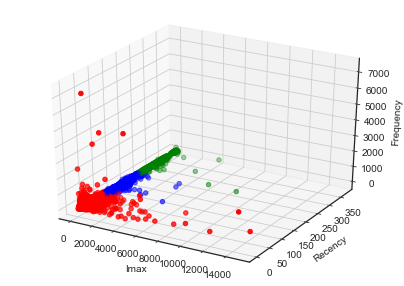

In [66]:
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(7)
ax= fig.add_subplot(projection='3d')
ax.scatter(df_1['Imax'], df_1['Recency'], df_1['Frequency'], c=c_1, s=20)
ax.set(xlabel='Imax', ylabel ='Recency', zlabel= 'Frequency')

In [70]:
for center in centers_1:
    print("Imax: ", center[0])
    print("Recency: ", center[1])
    print("Frequency: ", center[2])
    print("\n")

Imax:  419.04913494809693
Recency:  31.131141868512074
Frequency:  117.86089965397925


Imax:  206.43561208267093
Recency:  293.76629570747224
Frequency:  23.230524642289307


Imax:  271.4111801242236
Recency:  152.69068322981366
Frequency:  39.75155279503105




[Text(0.5, 0, 'MonetaryValue'), Text(0.5, 0, 'Recency'), Text(0.5, 0, 'Imax')]

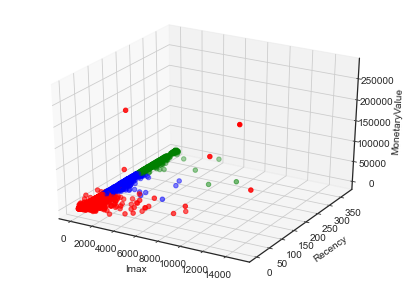

In [24]:
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(7)
ax= fig.add_subplot(projection='3d')
ax.scatter(df_2['Imax'], df_2['Recency'], df_2['MonetaryValue'], c=c_2, s=20)
ax.set(xlabel='Imax', ylabel ='Recency', zlabel= 'MonetaryValue')

[Text(0.5, 0, 'EntropyProducts'),
 Text(0.5, 0, 'Recency'),
 Text(0.5, 0, 'Imax')]

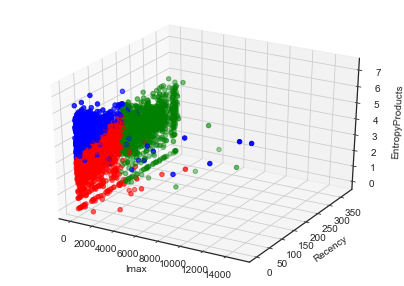

In [25]:
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(7)
ax= fig.add_subplot(projection='3d')
ax.scatter(df_3['Imax'], df_3['Recency'], df_3['EntropyProducts'], c=c_3, s=20)
ax.set(xlabel='Imax', ylabel ='Recency', zlabel= 'EntropyProducts')

[Text(0.5, 0, 'MonetaryValue'),
 Text(0.5, 0, 'Frequency'),
 Text(0.5, 0, 'Imax')]

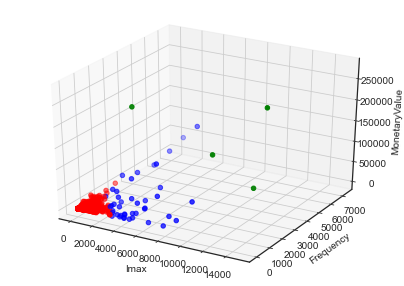

In [26]:
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(7)
ax= fig.add_subplot(projection='3d')
ax.scatter(df_4['Imax'], df_4['Frequency'], df_4['MonetaryValue'], c=c_4, s=20)
ax.set(xlabel='Imax', ylabel ='Frequency', zlabel= 'MonetaryValue')

[Text(0.5, 0, 'EntropyProducts'),
 Text(0.5, 0, 'Frequency'),
 Text(0.5, 0, 'Imax')]

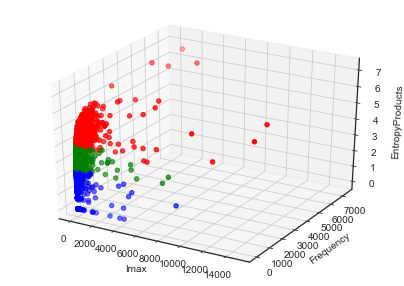

In [27]:
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(7)
ax= fig.add_subplot(projection='3d')
ax.scatter(df_5['Imax'], df_5['Frequency'], df_5['EntropyProducts'], c=c_5, s=20)
ax.set(xlabel='Imax', ylabel ='Frequency', zlabel= 'EntropyProducts')

[Text(0.5, 0, 'EntropyProducts'),
 Text(0.5, 0, 'MonetaryValue'),
 Text(0.5, 0, 'Imax')]

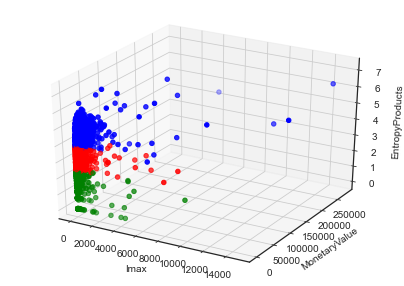

In [28]:
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(7)
ax= fig.add_subplot(projection='3d')
ax.scatter(df_6['Imax'], df_6['MonetaryValue'], df_6['EntropyProducts'], c=c_6, s=20)
ax.set(xlabel='Imax', ylabel ='MonetaryValue', zlabel= 'EntropyProducts')

[Text(0.5, 0, 'MonetaryValue'),
 Text(0.5, 0, 'Frequency'),
 Text(0.5, 0, 'Recency')]

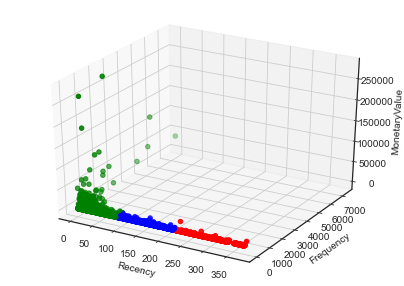

In [29]:
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(7)
ax= fig.add_subplot(projection='3d')
ax.scatter(df_7['Recency'], df_7['Frequency'], df_7['MonetaryValue'], c=c_7, s=20)
ax.set(xlabel='Recency', ylabel ='Frequency', zlabel= 'MonetaryValue')

[Text(0.5, 0, 'EntropyProducts'),
 Text(0.5, 0, 'Frequency'),
 Text(0.5, 0, 'Recency')]

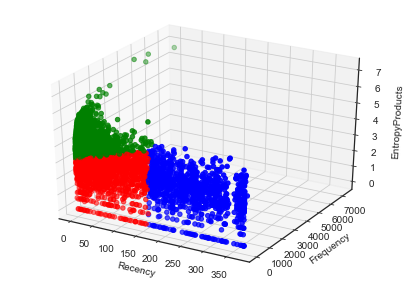

In [30]:
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(7)
ax= fig.add_subplot(projection='3d')
ax.scatter(df_8['Recency'], df_8['Frequency'], df_8['EntropyProducts'], c=c_8, s=20)
ax.set(xlabel='Recency', ylabel ='Frequency', zlabel= 'EntropyProducts')

[Text(0.5, 0, 'EntropyProducts'),
 Text(0.5, 0, 'MonetaryValue'),
 Text(0.5, 0, 'Recency')]

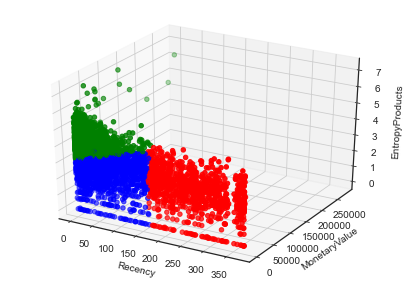

In [31]:
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(7)
ax= fig.add_subplot(projection='3d')
ax.scatter(df_9['Recency'], df_9['MonetaryValue'], df_9['EntropyProducts'], c=c_9, s=20)
ax.set(xlabel='Recency', ylabel ='MonetaryValue', zlabel= 'EntropyProducts')

[Text(0.5, 0, 'EntropyProducts'),
 Text(0.5, 0, 'MonetaryValue'),
 Text(0.5, 0, 'Frequency')]

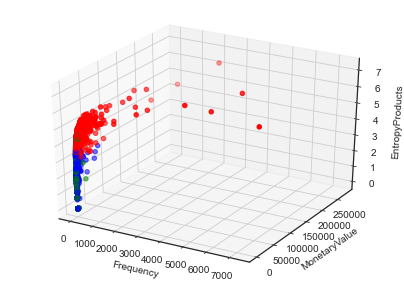

In [32]:
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(7)
ax= fig.add_subplot(projection='3d')
ax.scatter(df_10['Frequency'], df_10['MonetaryValue'], df_10['EntropyProducts'], c=c_10, s=20)
ax.set(xlabel='Frequency', ylabel ='MonetaryValue', zlabel= 'EntropyProducts')

## DBSCAN

## Knee Method per stimare il miglior valore di eps

Prima di eseguire l'algoritmo DBSCAN, cerchiamo di stimare il valore migliore di eps usando il knee method.

In [33]:
from scipy.spatial.distance import pdist, squareform

In [34]:
# Calcoliamo la matrice delle distanze usando il vettore delle distanze
X = scaler.fit_transform(clienti.values)
data_distance = pdist(X, metric='euclidean')
distances_matrix = squareform(data_distance)

In [35]:
# Questa funzione restituisce una lista contentente le distanze rispetto al k-esimo vicino
def calculate_kth_distances(distances_matrix, k):
    kth_distances = list()
    for d in distances_matrix:
        index_kth_distance = np.argsort(d)[k]
        kth_distances.append(d[index_kth_distance])
    return kth_distances
# Proviamo diversi valori di k
k_list = [4, 8, 16, 32, 64, 128, 256, 512]
# Dizionario che associa il valore di k con le sue rispettive distanze. Esempio: {2 : 2th_distances, 3: 3th_distances, ...}
distances = dict()
# Calcoliamo le kth_distances per ogni valore di k
for k in k_list:
    distances[k] = calculate_kth_distances(distances_matrix, k)

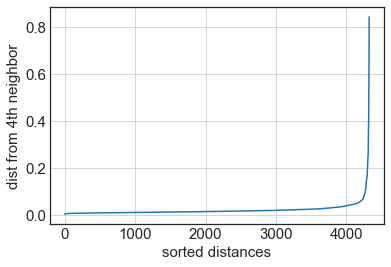

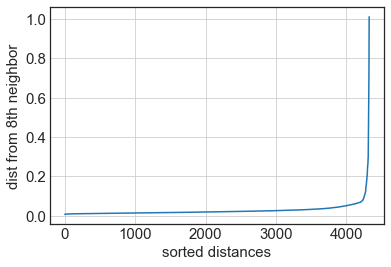

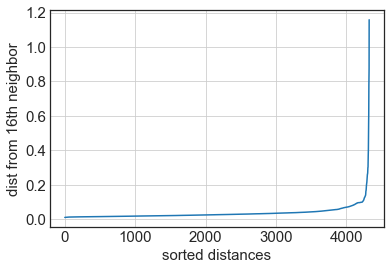

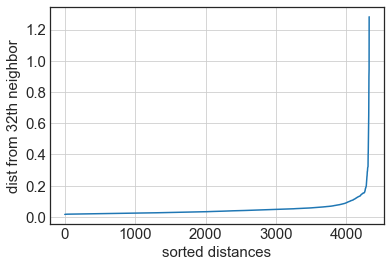

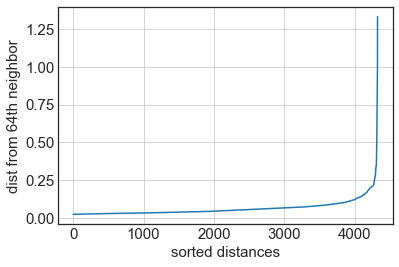

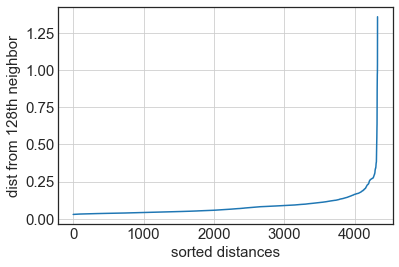

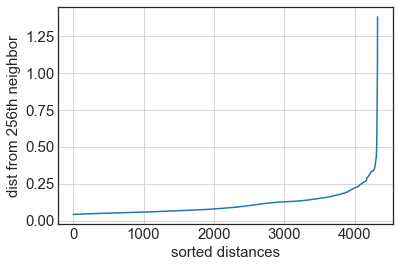

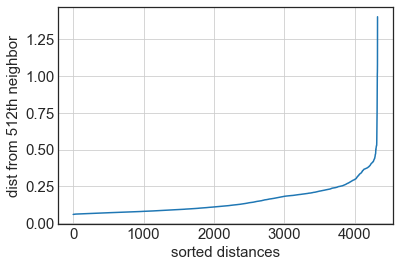

In [36]:
# Plottiamo i grafici
for k in k_list:
    kth_distances = distances[k]
    plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
    plt.ylabel('dist from %sth neighbor' % k, fontsize=15)
    plt.xlabel('sorted distances', fontsize=15)
    plt.tick_params(axis='both', which='major', labelsize=15)
    plt.grid()
    plt.show()

Dai grafici ottenuti abbiamo ricavato i seguenti a valori di epsilon:
- Per K = 4, epsilon = 0.1
- Per K = 8, epsilon = 0.1
- Per K = 16, epsilon = 0.1
- Per K = 32, epsilon = 0.2
- Per K = 64, epsilon = 0.25
- Per K = 128, epsilon = 0.25
- Per K = 256, epsilon = 0.3
- Per K = 512, epsilon = 0.4

In [37]:
from sklearn.cluster import DBSCAN

In [38]:
# Questo dizionario contiene valore di K -> valore di epsilon stimato dai grafici 
dictonary = {
    4 : 0.1,
    8 : 0.1,
    16 : 0.1,
    32 : 0.2,
    64 : 0.25,
    128 : 0.25,
    256 : 0.3,
    512 : 0.4
}

for k in dictonary:
    epsilon = dictonary[k]
    dbscan = DBSCAN(eps=epsilon, min_samples=k)
    dbscan.fit(X)
    result = np.unique(dbscan.labels_, return_counts=True)
    print("K = ", k)
    print("Epsilon: ", epsilon)
    print("Numero di cluster: ", len(result[0]))
    print("Dimensione dei cluster: ", result[1])
    if result[0][0] == -1:
        print("Il cluster con ", result[1][0], "elementi è considerato rumore (label -1)")
    print("Silhouette: ", silhouette_score(X, dbscan.labels_))
    print("**********************************************")


K =  4
Epsilon:  0.1
Numero di cluster:  2
Dimensione dei cluster:  [  46 4278]
Il cluster con  46 elementi è considerato rumore (label -1)
Silhouette:  0.444895975506476
**********************************************
K =  8
Epsilon:  0.1
Numero di cluster:  2
Dimensione dei cluster:  [  48 4276]
Il cluster con  48 elementi è considerato rumore (label -1)
Silhouette:  0.44489492095905775
**********************************************
K =  16
Epsilon:  0.1
Numero di cluster:  2
Dimensione dei cluster:  [  49 4275]
Il cluster con  49 elementi è considerato rumore (label -1)
Silhouette:  0.44035097227626563
**********************************************
K =  32
Epsilon:  0.2
Numero di cluster:  2
Dimensione dei cluster:  [  23 4301]
Il cluster con  23 elementi è considerato rumore (label -1)
Silhouette:  0.5526335981994625
**********************************************
K =  64
Epsilon:  0.25
Numero di cluster:  2
Dimensione dei cluster:  [  18 4306]
Il cluster con  18 elementi è considera

Facendo DBSCAN con diversi parametri di K e epsilon, otteniamo un unico cluster e alcuni elementi che sono considerati rumore.

# OPTIONAL SUBTASK: XMEANS

In [88]:
scaler = MinMaxScaler()
X = scaler.fit_transform(clienti.values)
X = X.tolist()

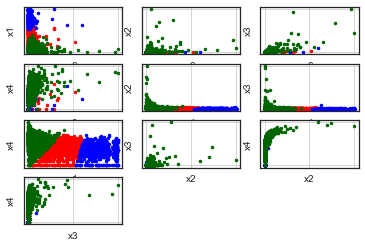

Total WCE: 141.83693941285708


In [89]:
from pyclustering.utils import read_sample
from pyclustering.samples.definitions import FAMOUS_SAMPLES
from pyclustering.cluster import cluster_visualizer_multidim
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer


centers = None
# performs cluster analysis using X-Means
xmeans_instance = xmeans(X, centers, kmax=3)
xmeans_instance.process()
clusters = xmeans_instance.get_clusters()
# visualize obtained clusters in multi-dimensional space
visualizer = cluster_visualizer_multidim()
visualizer.append_clusters(clusters, X)
visualizer.show(max_row_size=3)
print("Total WCE:", xmeans_instance.get_total_wce())

In [90]:
centers = xmeans_instance.get_centers()

In [91]:
centers = scaler.inverse_transform(centers)

In [92]:
for center in centers:
    print("Imax: ", center[0])
    print("Recency: ", center[1])
    print("Frequency: ", center[2])
    print("MonetaryValue: ", center[3])
    print("EntropyProducts: ", center[4])
    print("\n")

Imax:  272.8774617067836
Recency:  136.43763676148808
Frequency:  30.420131291028444
MonetaryValue:  634.9101859956237
EntropyProducts:  2.7436711874497366


Imax:  202.32018209408193
Recency:  290.14112291350546
Frequency:  22.265553869499254
MonetaryValue:  427.7283459787558
EntropyProducts:  2.532507535675662


Imax:  427.71610323518735
Recency:  29.719011268629625
Frequency:  125.31915667030145
MonetaryValue:  2649.481254089424
EntropyProducts:  3.870742258614186




In [93]:
print("Dimensione dei cluster:")
for l in clusters:
    print(len(l))

Dimensione dei cluster:
914
659
2751


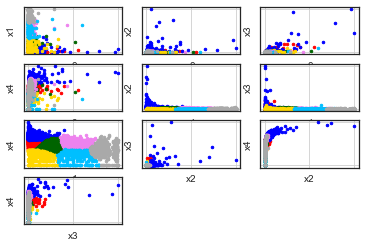

Total WCE: 69.1828584741045


In [94]:
centers = None
# performs cluster analysis using X-Means
xmeans_instance = xmeans(X, centers, kmax=7)
xmeans_instance.process()
clusters = xmeans_instance.get_clusters()
# visualize obtained clusters in multi-dimensional space
visualizer = cluster_visualizer_multidim()
visualizer.append_clusters(clusters, X)
visualizer.show(max_row_size=3)
print("Total WCE:", xmeans_instance.get_total_wce())

In [95]:
centers = xmeans_instance.get_centers()

In [96]:
centers = scaler.inverse_transform(centers)

In [97]:
for center in centers:
    print("Imax: ", center[0])
    print("Recency: ", center[1])
    print("Frequency: ", center[2])
    print("MonetaryValue: ", center[3])
    print("EntropyProducts: ", center[4])
    print("\n")

Imax:  343.9288107202682
Recency:  22.25879396984919
Frequency:  64.67587939698504
MonetaryValue:  1752.7871943048576
EntropyProducts:  3.700280631283411


Imax:  657.705882352941
Recency:  24.51131221719455
Frequency:  281.4683257918552
MonetaryValue:  5242.4883484162965
EntropyProducts:  4.915404236277842


Imax:  304.72206703910626
Recency:  85.62430167597776
Frequency:  36.01955307262566
MonetaryValue:  792.5136871508374
EntropyProducts:  3.2620228130446836


Imax:  248.19277108433755
Recency:  39.995180722891504
Frequency:  9.445783132530124
MonetaryValue:  691.938867469879
EntropyProducts:  1.7192069688313245


Imax:  283.9976470588235
Recency:  199.59999999999994
Frequency:  47.86588235294117
MonetaryValue:  724.729670588235
EntropyProducts:  3.5359313401049044


Imax:  193.0985915492958
Recency:  201.72887323943667
Frequency:  7.165492957746479
MonetaryValue:  395.77806338028176
EntropyProducts:  1.6005970238571934


Imax:  173.89901477832515
Recency:  318.7019704433498
Frequen

In [98]:
print("Dimensione dei cluster:")
for l in clusters:
    print(len(l))

Dimensione dei cluster:
1194
884
716
415
425
284
406
